# Importing the Libraries

In [1]:

import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline


# Reading the Data File

In [2]:
# Load the data
data = pd.read_csv('./training_data/training_data/Cleaned Data/Order Data by Region/combined_data.csv')

# Split the data into training and testing sets
y = data['Gap']
#Convert the date into numerical values for the model
# Convert Date column to datetime
data['Date'] = pd.to_datetime(data['Date'])
# Convert datetime to numerical values (epoch time)
data['Date'] = data['Date'].astype('int64') // 10**9

data = data.drop(['Gap'], axis=1)
# X = data[['Start Region ID','Time Slot','Day','Temprature','Weather']]
X=data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [76]:
X.head()


,Start Region ID,Date,Time Slot,Day,Temprature,Weather,1,1#1,1#10,1#11,...,7#1,7#2,7#3,8,8#1,8#2,8#3,8#4,8#5,9#1#1
0,1,1451606400,1,4,3.5,1.0,2739,498,498,3984,...,0,0,0,166,0,7553,1743,2075,0,0
1,1,1451606400,2,4,3.0,1.0,2739,498,498,3984,...,0,0,0,166,0,7553,1743,2075,0,0
2,1,1451606400,3,4,3.0,1.0,2739,498,498,3984,...,0,0,0,166,0,7553,1743,2075,0,0
3,1,1451606400,4,4,3.0,1.0,2739,498,498,3984,...,0,0,0,166,0,7553,1743,2075,0,0
4,1,1451606400,5,4,3.0,1.0,2739,498,498,3984,...,0,0,0,166,0,7553,1743,2075,0,0


# Trying different Models and comparing the results

In [3]:
modelMap = {}
# Fit the models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    modelMap[name] = model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    Accuracy = model.score(X_test, y_test)
    mae = np.mean(np.abs(y_pred - y_test)) # Mean Absolute Error
    print(f'{name} - Mean Squared Error: {mse:.4f}, R-squared: {r2:.4f}, mae {mae:.4f}')


Linear Regression - Mean Squared Error: 2339.9539, R-squared: 0.1369, mae 11.6720


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.67154e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Ridge Regression - Mean Squared Error: 2339.9539, R-squared: 0.1369, mae 11.6720


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.601e+08, tolerance: 6.342e+04
  model = cd_fast.enet_coordinate_descent(


Lasso Regression - Mean Squared Error: 2340.8140, R-squared: 0.1366, mae 11.4409
Decision Tree Regression - Mean Squared Error: 58.5290, R-squared: 0.9784, mae 0.8514
Random Forest Regression - Mean Squared Error: 53.0311, R-squared: 0.9804, mae 1.6310
Gradient Boosting Regression - Mean Squared Error: 1300.8258, R-squared: 0.5202, mae 8.7129


# Optimise the model

n_estimators=100 is a hyperparameter of the RandomForestRegressor algorithm that specifies the number of decision trees to include in the random forest. Each decision tree is trained on a randomly sampled subset of the training data, and the final prediction is made by averaging the predictions of all the trees.

max_depth=10 is another hyperparameter of the RandomForestRegressor algorithm that specifies the maximum depth of each decision tree in the random forest. This controls the complexity of each decision tree and can help prevent overfitting. A higher max_depth value allows the tree to capture more complex patterns in the data, but can also make the tree more prone to overfitting.

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

param_grid = {
    'max_depth': [2, 4, 6, 8, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

dt_reg = DecisionTreeRegressor(random_state=42)

grid_search = GridSearchCV(dt_reg, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_dt_reg = grid_search.best_estimator_


from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict target variable for test data
y_pred = best_dt_reg.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = np.mean(np.abs(y_pred - y_test)) # Mean Absolute Error
accuracy = best_dt_reg.score(X_test, y_test)

# Print evaluation metrics
print(f'Best Decision Tree Regressor - Mean Squared Error: {mse:.4f}, R-squared: {r2:.4f}, MAE: {mae:.4f}, Accuracy: {accuracy:.4f}')


In [60]:
# Ignore this Cell ...


# # DecisionTreeRegressor performed best 

# model = DecisionTreeRegressor()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f'Random Forest Regression - Mean Squared Error: {mse:.4f}, R-squared: {r2:.4f}')

Random Forest Regression - Mean Squared Error: 53.1521, R-squared: 0.9804


# Plotting the Actual and the Predicted Gap 

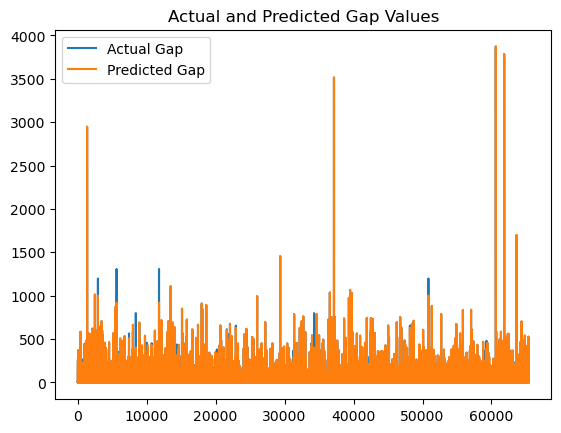

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

# Predict the gap values for the testing data using the Decision Tree Regressor model
y_pred = modelMap['Decision Tree Regression'].predict(X_test)

# Plot the actual and predicted gap values
plt.plot(y_test.values, label='Actual Gap')
plt.plot(y_pred, label='Predicted Gap')
plt.title('Actual and Predicted Gap Values')
plt.legend()
plt.savefig('Actual and Predicted Gap Values.png')
plt.show()


# Printing the 10 most important features contributing to the predictions 

In [22]:
# Get feature importances
importances = modelMap['Decision Tree Regression'].feature_importances_
# combine the features and the importances and sort them in descending order on the basis of importances
feature_importances = list(zip(X_train.columns, importances))
feature_importances.sort(key=lambda x: x[1], reverse=True)
# print by multiplying the importances by 100
for i in range(len(feature_importances)):
    if i>10:
        break
    print(f'{feature_importances[i][0]}: {feature_importances[i][1]*100:.2f}%')

Time Slot: 45.50%
Temprature: 10.05%
5#1: 9.46%
Day: 7.90%
Date: 7.22%
Weather: 4.91%
4#12: 3.34%
13#8: 1.93%
4#7: 1.69%
17#3: 1.55%
20#5: 1.35%


# Printing the Actual and the predicted values side by side

In [57]:
actual_values = y_test
predicted_values = y_pred
combined = pd.DataFrame({'Actual': actual_values, 'Predicted': predicted_values})
difference = (combined['Actual'] - combined['Predicted'])
difference = difference.abs()
print("Mean of the Differences : ",difference.mean())
for i in range(combined.shape[0]):
    print(combined.iloc[i, 0], combined.iloc[i, 1])


Mean of the Differences :  1.6431129868342422
2 2.05
0 1.69
0 0.48
9 7.29
0 0.07
8 7.84
0 0.13
0 0.38
0 0.34
0 0.65
7 7.29
76 74.97
0 0.48
3 2.98
0 0.09
0 0.27
0 0.39
10 6.51
0 0.01
0 0.22
1 1.01
1 0.76
3 2.85
4 5.55
263 263.77
0 0.29
0 1.69
0 0.22
3 2.48
1 3.89
0 0.07
5 4.12
2 0.08
7 6.92
1 3.45
7 3.61
1 1.41
4 2.99
3 3.18
0 3.26
0 1.44
1 1.06
1 1.12
2 2.09
3 3.77
1 1.76
3 2.4
0 0.46
1 1.37
3 2.49
3 1.64
98 93.89
9 8.97
3 2.27
4 3.0
0 1.44
0 0.37
3 2.53
1 1.11
31 37.39
8 7.72
3 2.62
2 2.49
2 0.4
0 0.16
1 1.23
1 0.46
4 3.81
5 5.37
2 2.14
0 0.59
7 6.52
7 6.21
2 1.46
1 0.79
371 331.09
4 7.38
0 0.05
19 18.85
0 0.92
1 1.1
1 0.06
74 134.52
1 1.1
55 61.82
1 0.96
5 6.73
10 8.4
0 0.06
319 366.99
1 1.49
0 0.15
15 13.3
2 2.98
0 0.11
0 0.19
0 0.43
0 0.77
1 0.94
0 0.92
2 0.92
0 0.2
0 0.41
1 0.78
5 4.61
1 0.82
1 0.82
1 1.11
1 0.82
1 2.05
1 1.03
0 0.06
1 2.94
1 0.51
1 1.24
1 1.12
1 0.72
3 3.38
3 2.07
3 3.62
0 0.17
0 1.06
0 0.18
0 1.01
1 0.86
0 0.43
1 0.72
4 5.5
0 0.07
6 7.19
28 26.71
11 13.49
3 5.85

# Model Learning and Error

first computes the learning curve using the learning_curve function from scikit-learn. It then computes the mean and standard deviation of the training and testing scores, and plots the learning curve.

It then computes the error curve by training the model on increasingly larger subsets of the training data and computing the mean squared error on both the training and testing data. Finally, it plots the error curve.

In [3]:
from sklearn.model_selection import learning_curve

# Load the data
data = pd.read_csv('./training_data/training_data/Cleaned Data/Order Data by Region/combined_data.csv')

# Split the data into training and testing sets
y = data['Gap']
#Convert the date into numerical values for the model
# Convert Date column to datetime
data['Date'] = pd.to_datetime(data['Date'])
# Convert datetime to numerical values (epoch time)
data['Date'] = data['Date'].astype('int64') // 10**9

data = data.drop(['Gap'], axis=1)
# X = data[['Start Region ID','Time Slot','Day','Temprature','Weather']]
X=data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = DecisionTreeRegressor()


Generating a learning curve for the decision tree regressor model by plotting the mean squared error (MSE) as a function of the number of training examples. The training error is plotted in blue, and the cross-validation error is plotted in orange. The shaded areas represent the standard deviation of the scores. The cv parameter in the learning_curve() function specifies the number of folds for cross-validation, and the train_sizes parameter specifies the sizes of the training sets to use.

In [ ]:

# Generate the learning curve
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        scoring='neg_mean_squared_error')

# Calculate the mean and standard deviation of the training and testing scores
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


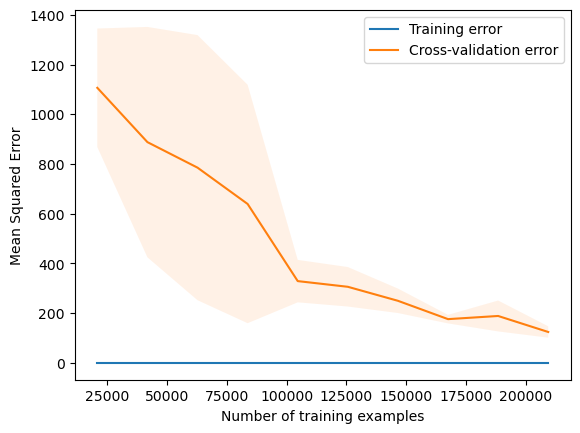

In [7]:

# Plot the learning curve
plt.plot(train_sizes, train_mean, label='Training error')
plt.plot(train_sizes, test_mean, label='Cross-validation error')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.legend(loc='best')
plt.xlabel('Number of training examples')
plt.ylabel('Mean Squared Error')
plt.savefig('MSE Curve.png')
plt.show()



Here the scoring parameter is set to 'r2', which calculates the coefficient of determination (R-squared) instead of the mean squared error. The train_scores and test_scores variables represent the model's training and validation scores, respectively, at each training set size. The code then calculates the mean and standard deviation of these scores, and plots the results using the plot() and fill_between() functions from Matplotlib. The resulting plot shows how the model's performance changes as the amount of training data increases, based on the R-squared score.

In [8]:
# Generate the learning curve
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        scoring='r2')

# Calculate the mean and standard deviation of the training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


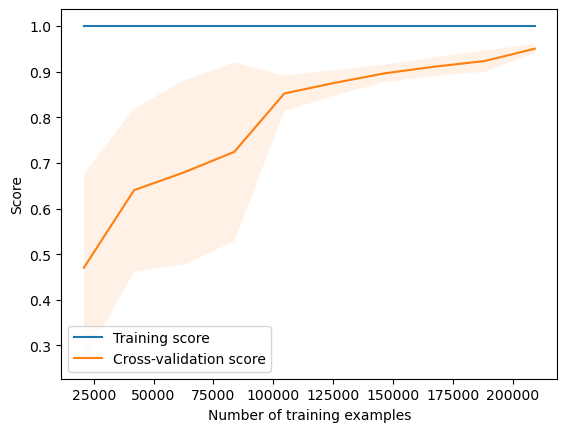

In [10]:

# Plot the learning curve
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.legend(loc='best')
plt.xlabel('Number of training examples')
plt.ylabel('Score')
plt.savefig('R2 Curve.png')
plt.show()